In [0]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [2]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [0]:
url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'
df = pd.read_csv(url)
df=df.dropna() # Drop unlear data
# Dataset is now stored in a Pandas Dataframe

In [4]:
# Print the first ten records of the dataset
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1456cf5470>,
      dtype=object)

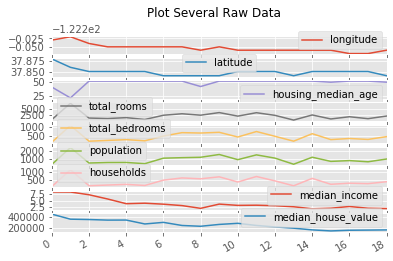

In [5]:
# Print each feature of the dataset
plt.style.use('ggplot')
df.head(19).plot(subplots=True, title='Plot Several Raw Data')

In [0]:
# Resacle the median_income 
X_in=df['median_income']
X_in=X_in*10000
df['median_income']=X_in

In [7]:
# Check the data after scale
df['median_income']

0        83252.0
1        83014.0
2        72574.0
3        56431.0
4        38462.0
          ...   
20635    15603.0
20636    25568.0
20637    17000.0
20638    18672.0
20639    23886.0
Name: median_income, Length: 20433, dtype: float64

In [0]:
# Get the raw data
Y=df['median_house_value'] # output data from the 9th column
X=df.loc[:,'longitude':'median_income']# input data from the 1st column to the 8th column

In [0]:
# Get the input and output data and convert to np arraies
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.3, random_state=2003)
x_train=x_train.to_numpy()
x_test=x_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [0]:
# Preprocess and normalize the raw data for training and testing
standard_x=StandardScaler()
x_train=standard_x.fit_transform(x_train)
x_test=standard_x.fit_transform(x_test)

In [0]:
# Reshape the datasets to fit in the Conv1D layer
x_train=x_train.reshape( x_train.shape[0], x_train.shape[1], 1)
x_test=x_test.reshape( x_test.shape[0], x_test.shape[1], 1)
y_train=y_train.reshape( y_train.shape[0], 1)
y_test=y_test.reshape( y_test.shape[0], 1)

In [12]:
# Size of the datasets
print('x_train:',x_train.shape,'\n', 'y_train:', y_train.shape, '\n',
      'x_test:', x_test.shape, '\n', 'y_test:', y_test.shape,'\n')

x_train: (14303, 8, 1) 
 y_train: (14303, 1) 
 x_test: (6130, 8, 1) 
 y_test: (6130, 1) 



In [13]:
# Check the input data after normalization 
print(x_train[:1])

[[[-1.4705277 ]
  [ 1.05454652]
  [-0.9240538 ]
  [ 0.78379359]
  [ 1.19566007]
  [ 0.18534899]
  [ 1.27417708]
  [ 0.04424569]]]


In [0]:
# Customize the R2 score metric
from keras import backend as K
def R2SCORE(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [15]:
# Build the CNN model

#from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Embedding
from keras.layers import Conv1D, MaxPooling1D

model = Sequential()
model.add(Conv1D(128, 2, input_shape=(8, 1), activation='relu'))
model.add(Conv1D(128, 2, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(2))
model.add(Conv1D(256, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
#model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
#model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.0001)))
#model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))



model.compile(optimizer='adam',
              loss='mae',
              metrics=[R2SCORE])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [16]:
# Get the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 7, 128)            384       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 128)            32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 128)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 3, 128)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 2, 256)            65792     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 256)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 256)           

In [17]:
# Set up training epochs and start training and evaluate the model after each epoch
epochs=150
history=model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_data=(x_test, y_test))




Train on 14303 samples, validate on 6130 samples
Epoch 1/150





14303/14303 [==============================] - 4s 260us/step - loss: 119178.5289 - R2SCORE: -0.9086 - val_loss: 100841.5017 - val_R2SCORE: -0.4856
Epoch 2/150
14303/14303 [==============================] - 1s 96us/step - loss: 82579.8371 - R2SCORE: 0.0660 - val_loss: 82788.8164 - val_R2SCORE: -0.0049
Epoch 3/150
14303/14303 [==============================] - 1s 87us/step - loss: 71851.7061 - R2SCORE: 0.2347 - val_loss: 77645.2184 - val_R2SCORE: 0.0956
Epoch 4/150
14303/14303 [==============================] - 1s 87us/step - loss: 69918.9796 - R2SCORE: 0.2920 - val_loss: 74476.0405 - val_R2SCORE: 0.1595
Epoch 5/150
14303/14303 [==============================] - 1s 89us/step - loss: 68861.9039 - R2SCORE: 0.3167 - val_loss: 74173.5640 - val_R2SCORE: 0.1663
Epoch 6/150
14303/14303 [==============================] - 1s 90us/step - loss: 68340.8902 - R2SCORE: 0.3310 - val_loss: 74605.2224 - val_R2SCORE: 0.1599
Epoch 7/150
1

In [0]:
# Save the model 
model.save('0883145_1dconv_reg.h5')

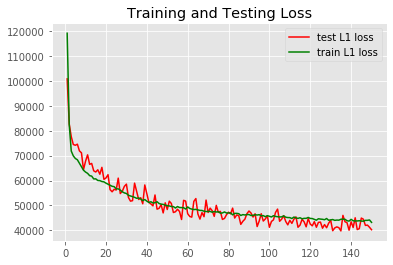

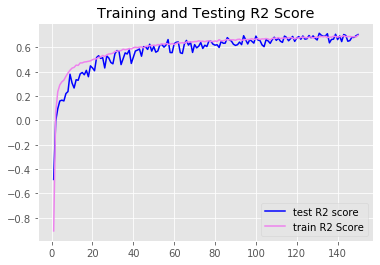

In [19]:
# Plot the change of the L1 loss and R2 score

x=range(1,epochs+1)
test_loss=history.history['val_loss']
train_loss=history.history['loss']
test_r2=history.history['val_R2SCORE']
train_r2=history.history['R2SCORE']

plt.plot(x, test_loss,'r')
plt.plot(x, train_loss,'g')
plt.title('Training and Testing Loss')
plt.legend(['test L1 loss', 'train L1 loss'])

plt.figure()
plt.plot(x, test_r2, 'b')
plt.plot(x, train_r2, 'violet')
plt.title('Training and Testing R2 Score')
plt.legend(['test R2 score', 'train R2 Score'])

In [20]:
# Print the result of the last epoch
print('The final result at', epochs, 'epoch:')
print('The L1 loss:', test_loss[epochs-1])
print('The R2 score:', test_r2[epochs-1])

The final result at 150 epoch:
The L1 loss: 40238.76307606036
The R2 score: 0.7057091304178533


In [21]:
# Print the best evaluation occured during training
print('After', epochs, 'epochs')
print('The minimum L1 Loss is:', np.min(test_loss))
print('The corresponding R2 score is:', np.max(test_r2))
print('The best result occurs at the', np.argmax(test_r2)+1, 'epoch.')

After 150 epochs
The minimum L1 Loss is: 39760.53912749796
The corresponding R2 score is: 0.7164230799986138
The best result occurs at the 131 epoch.
